# Function isccsym

## Description

Check if the input image is symmetric and return a boolean value. 

## Synopse

Check for conjugate symmetry

- **b = isccsym(F)**

  - **b**: Boolean. 
  - **F**: Image. Complex image.

In [1]:
import numpy as np

def isccsym2(F):

    if len(F.shape) == 1: F = F[np.newaxis,np.newaxis,:] 
    if len(F.shape) == 2: F = F[np.newaxis,:,:] 

    n,m,p = F.shape
    x,y,z = np.indices((n,m,p))

    Xnovo = np.mod(-1*x,n) 
    Ynovo = np.mod(-1*y,m)
    Znovo = np.mod(-1*z,p)  

    aux = np.conjugate(F[Xnovo,Ynovo,Znovo])

    return (abs(F-aux)<10E-4).all()

In [2]:
def isccsym(F):
    import ia898.src as ia
    
    if len(F.shape) == 1: F = F[np.newaxis,np.newaxis,:] 
    if len(F.shape) == 2: F = F[np.newaxis,:,:] 

    n,m,p = F.shape
    
    return(abs(F-np.conjugate(ia.ptrans(F[::-1,::-1,::-1],(1,1,1))))<10E-4).all()
  

## Examples

In [11]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python isccsym.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    
    import matplotlib.image as mpimg

[NbConvertApp] Converting notebook isccsym.ipynb to python
[NbConvertApp] Writing 3808 bytes to isccsym.py


### Numeric Example: 1D data

In [2]:
if testing:
    F = np.arange(5)
    print('Is 1d odd dimension vetor symmetric?',ia.isccsym(F),'\n')
    F =  np.arange(6)
    print('Is 1d even dimension vetor symmetric?',ia.isccsym(F),'\n')
    F = np.array( [1j,1j,0,1j,1j] )
    print('Is 1d even dimension vetor symmetric?',ia.isccsym(F),'\n')

Is 1d odd dimension vetor symmetric? False 

Is 1d even dimension vetor symmetric? False 

Is 1d even dimension vetor symmetric? False 



### Numeric Example: real symmetric matrix

In [3]:
if testing:
    F = np.array( [ [0,1,1], 
                    [2,4,3],
                    [2,3,4]] )
    print('Is function F symmetric?',ia.isccsym(F),'\n')

Is function F symmetric? True 



### Numeric Example: imaginary matrix

In [4]:
if testing:
    F = np.array([ [ 0j,1j,-1j], 
                   [ 2j,4j,-3j],
                   [-2j,3j,-4j]] )
    print('Is function F symmetric?',ia.isccsym(F),'\n')
    
    F = np.array( [ [ 2j,1j,-1j], 
                    [ 2j,4j,-3j],
                    [-2j,3j,-4j]] )
    print('Is function F symmetric?',ia.isccsym(F),'\n')

Is function F symmetric? True 

Is function F symmetric? False 



### Numeric Example: Fourier transformation of a real image is symmetric

In [5]:
if testing:        
    print('Is this function symmetric?')
    print(ia.isccsym(np.fft.fft2(np.random.rand(100,100)))) # dimension variation
    print(ia.isccsym(np.fft.fft2(np.random.rand(101,100))))
    print(ia.isccsym(np.fft.fft2(np.random.rand(101,101))))

Is this function symmetric?
True
True
True


### Image Example: circular filter

""
circular filter

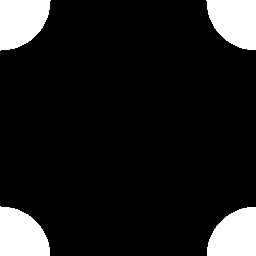

""
""

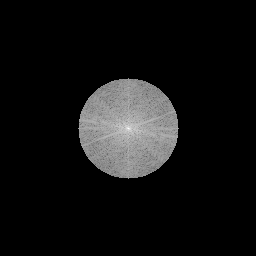

Is this filter symmetric? True


In [14]:
if testing:
    img = mpimg.imread('../data/cameraman.tif')
    F = ia.dft(img)
    imgc = 1 * ia.circle(img.shape, 50, [img.shape[0]/2, img.shape[1]/2])  
    imgct = ia.ptrans(imgc, np.array(imgc.shape)//2)
    ia.adshow(ia.normalize(imgct),'circular filter')
    res = F * imgct
    ia.adshow(ia.dftview(res))
    print('Is this filter symmetric?', ia.isccsym(res))

### Image Example 2: retangular filter

In [17]:
if False: # testing:
    mquadra = ia.rectangle(img.shape, [50,50], [img.shape[0]/2, img.shape[1]/2])
    ia.adshow(mquadra,'RETANGULO')
    mquadra = ia.ptrans(mquadra, array(mquadra.shape)/2)
    ia.adshow(ia.normalize(mquadra),'retangular filter')
    mfiltrada = F * mquadra                                        
    
    print('Is this filter symmetric?', ia.isccsym(mfiltrada))

## Equation
$$ \begin{matrix}
F(s,u,v) &=& F^{\star}(-s \ mod\ P,-u \ mod\ N, -v \ mod\ M) \\  & & (0,0,0) \leq (s,u,v) < (P,N,M)
\end{matrix} $$

## See also

- [dftview](dftview.ipynb) - Ready for central spectrum visualization of DFT 

## Contributions

- Marcelo Zoccoler, 1st semester, 2017
- Mariana Pinheiro, 1st semester 2011